## Small Intro to Deep Learning

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

- units is the size of the output and keras.sequential expects a list of layers
- Use example : We could define a linear model accepting three input features ('sugars', 'fiber', and 'protein') and producing a single output ('calories')

In [ ]:
model = keras.Sequential([
    layers.Dense(units=1, input_shape = [3])]
)

- Stacking Dense Layers

In [ ]:
modelk= keras.Sequential(
    [
        # Hidden layers
        layers.Dense(units = 4, activation = 'relu',input_shape = [2]),
        # layers.Dense(units = 3, input_shape =[4],activation = 'relu'),
        #No need to precise the input shape since it' s the output of the previous layer
        # The bias is included by default unless we won't to remove it  use_bias=False
        layers.Dense(units = 3,activation = 'relu'),
         # the linear output layer
        layers.Dense(units = 1)
    ]
)

### PyTorch

In [ ]:
import torch
import torch.nn as nn

In [ ]:
model_nn = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.ReLU(),
    nn.Linear(3,1)

    )

### Loss Function
- The loss function tells a network what problem to solve (Regression, Classification....). It measures the disparity between the target's true value and the value the model predicts.
- For regression, common Loss Functions:

      -  MAE : mean absolute error(abs(y_true - y_pred)).
      -  MSE : Mean squared error.
      - Hubor loss.

- Loss example

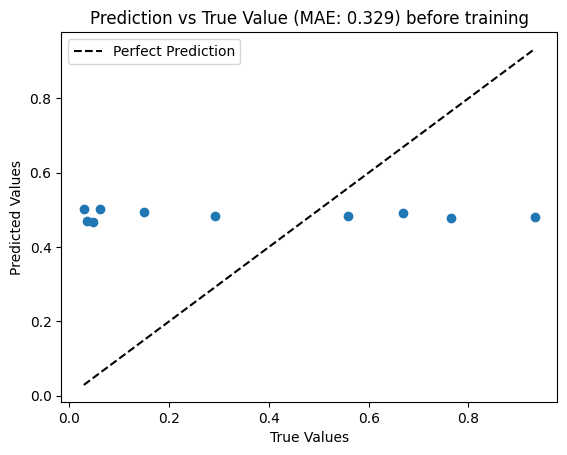

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# generate random x
x= torch.rand(10,2)  # 10 examples, each with 2 features
y_true = torch.rand(10,1) # 10 examples, each with 1 target
y_pred = model_nn(x)
# loss MAE
mae_loss = nn.L1Loss()
mae = mae_loss(y_pred, y_true)
mae_function = np.abs(y_true.detach().numpy() - y_pred.detach().numpy()).mean()

plt.scatter(y_true.detach().numpy(), y_pred.detach().numpy())
plt.plot([y_true.detach().numpy().min(), y_true.detach().numpy().max()], [y_true.detach().numpy().min(), y_true.detach().numpy().max()], 'k--', label='Perfect Prediction')
plt.title(f'Prediction vs True Value (MAE: {mae.item():.3f}) before training')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [ ]:
mae_function

0.32944176

### The Optimizer

We've described the problem we want the network to solve, but now we need to say how to solve it. This is the job of the optimizer. The optimizer is an algorithm that adjusts the weights to minimize the loss.

- example : Stochastic Gradient Descent SGD : The gradient is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change fastest. We call our process gradient descent because it uses the gradient to descend the loss curve towards a minimum. Stochastic means "determined by chance." Our training is stochastic because the minibatches are random samples from the dataset. And that's why it's called SGD!



- batch is an iteration sample of a training dataset
- Epoch is when we do a complete round on all the dataset.
- The number of epochs you train for is how many times the network will see each training example.

### Learning Rate

The learning rate determines how much the weights of a model are adjusted during training with respect to the loss gradient. Essentially, it controls how big a step the model takes towards the optimal set of weights (or the minimum of the loss function) during training.

### Re-explaination of the concepts with Mathematical Modeling

The loss function can be like this, example ofe Frobenius norm squared :
-  $ ||Y - WX||^2_F $  

#### What does the optimizer do?

$\mathcal{L}_W(W) = ||Y - WX||^2_F$  
$= \text{tr}[(Y-WX)^T(Y-WX)] $  
$= \text{tr}[Y^TY-Y^TWX-X^TW^TY+X^TW^TWX] $  

Since Linearity of trace :  

$= \text{tr}(Y^TY) - \text{tr}(Y^TWX) - \text{tr}(X^TW^TY) + \text{tr}(X^TW^TWX) $  

Since $\text{tr}(X^T) = \text{tr}(X)$, we have $\text{tr}(Y^TWX) = \text{tr}(X^TW^TY)$  


$\mathcal{L}_W(W) = \text{tr}(Y^TY) - 2 \text{tr}(Y^TWX) + \text{tr}(X^TW^TWX) $  
#### Computing the gradient and setting it to 0:
we compute the gradient of  $\mathcal{L}_W(W)$ with respect to $ W$ and set it to zero to find the optimal $W $:

$
\nabla_W \mathcal{L}_W(W) = -2X^T Y + 2X^T WX
$

We then set the gradient equal to zero for minimization:

$
-2X^T Y + 2X^T W^*X = 0
$

$
X^T W^*X = X^T Y
$

Assuming $X^T X$ is invertible, solve for $ W $:

$
W^* = (X^T X)^{-1} X^T Y
$


In machine learning, particularly when training using mini-batch gradient descent, the weights $W$ do not immediately move to the optimal solution $W^*$ after each mini-batch update. Instead, the weight update is a gradual process that ideally approaches $W^*$ over multiple iterations and epochs of training. Here’s how it works and some key concepts:

#### Mini-Batch Gradient Descent Process:

1. **Initialization:**
   The weights $W$ are typically initialized randomly or using some heuristic methods like He or Glorot initialization.

2. **Mini-Batch Selection:**
   During each training epoch, the dataset is divided into small batches. Each mini-batch consists of a subset of the training data.

3. **Gradient Computation:**
   For each mini-batch, the gradient of the loss function with respect to the weights $\nabla_W \mathcal{L}(W)$ is computed. This gradient indicates the direction in which the loss function has the steepest increase.

4. **Weight Update:**
   The weights are updated in the opposite direction of the gradient to reduce the loss. The update rule typically looks like:
   $
   W := W - \eta \nabla_W \mathcal{L}(W)
   $
   Here, $ \eta $ is the learning rate, a hyperparameter that controls how big a step is taken in the direction opposite to the gradient.

#### Convergence Towards $ W^* $:

- **Gradient Direction:**
  The gradient computed using a mini-batch is an estimate of the true gradient based on the full dataset. Thus, it might not precisely point in the exact direction of the steepest descent for the entire dataset, especially if the mini-batch isn't perfectly representative of the overall data distribution.

- **Learning Rate:**
  The learning rate $ \eta $ plays a critical role in how effectively and quickly the weights converge to $W^* $. Too large a learning rate might cause the updates to overshoot the optimal, while too small a learning rate may lead to slow convergence.

- **Iterations and Epochs:**
  More training epochs and iterations over the mini-batches generally lead to better approximation of $ W^* $, assuming the learning rate is appropriately adjusted (often reduced) over time.

- **Stochastic Nature:**
  Since each mini-batch randomly samples the training data, the updates exhibit stochastic behavior, leading to fluctuations in the loss trajectory rather than smooth descent. This is why the method is known as Stochastic Gradient Descent (SGD) when applied with mini-batches.

### Summary:

After each mini-batch update, $ W $ does not necessarily move directly to $ W^* $ but makes a step towards it. The quality and direction of this step depend on the mini-batch's representativeness of the full dataset and the learning rate. Over many epochs, with appropriate learning rate adjustments and good data shuffling, $ W $ is expected to converge towards $ W^* $ or oscillate close to it, minimizing the overall loss function.

## Application on a Binary Classification Problem : Predicting Hotel Cancellations
- What differs from above is the loss function since we'll be using Cross Entropy because it's a classification problem not a regression one.

### Data preprocessing

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [22]:
df = pd.read_csv('/content/hotel.csv')
df.drop(['company', 'agent'],axis=1,inplace=True)
df1 = df.copy(deep = True)
# Calculate the most common country
most_common_country = df1['country'].mode()[0]
df1['country'] = df1['country'].fillna(most_common_country)
# Replace negative adr with median of adr column
df1.loc[df['adr'] < 0, 'adr'] = df1['adr'].median()
# Remove rows with 0 adults
df1 = df1[df1['adults'] !=0 ]
# Remove rows with 10 children or 10 babies
df1 = df1[(df1['children'] != 10) & (df1['children'].notna())]
df1 = df1[df1['babies'] != 10]
# Reset the index
df1.reset_index(drop=True, inplace=True)
# Drop the `reservation_status` feature
df1 = df1.drop(['reservation_status', 'reservation_status_date','assigned_room_type', 'arrival_date_year','is_repeated_guest','previous_cancellations',
          'previous_bookings_not_canceled','required_car_parking_spaces','total_of_special_requests','arrival_date_day_of_month','booking_changes'], axis=1)

- Encoding categorical features:

In [23]:
categorical = df1.select_dtypes(include='object')
categorical.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder

si = LabelEncoder()
for col in categorical.columns:
  df1[col] = si.fit_transform(df1[col])


In [ ]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr'],
      dtype='object')

In [ ]:
len(df1.columns)

19

In [25]:
# Create training and validation splits
df_train = df1.sample(frac=0.9, random_state=0)
df_test = df1.drop(df_train.index)
display(df_train.head(4))


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
71346,0,1,48,5,27,0,1,1,0.0,0,0,162,6,3,0,0,0,2,170.0
71643,0,1,229,5,28,1,4,2,0.0,0,0,135,4,3,0,1,0,2,110.0
67530,0,1,196,8,18,1,1,2,0.0,0,0,56,6,3,0,0,0,2,117.0
13590,1,1,12,1,34,1,4,2,0.0,0,2,135,6,3,0,0,0,2,242.0


- Scaling:

In [26]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_test = (df_test- min_) / (max_ - min_)

- Split features and target

In [27]:
X_train = df_train.drop('is_canceled', axis=1)
X_test = df_test.drop('is_canceled', axis=1)
y_train = df_train['is_canceled']
y_test = df_test['is_canceled']

In [ ]:
print(X_train.shape)

(95185, 18)


In [ ]:
len(X_train.keys())

18

### Defining the model

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

# Wider network more units (neurons)
# Deeper more layers
model = keras.Sequential(
    [
        # nbr of columns len(X_train.keys()) = 18
        layers.Dense(units = 512, activation = 'relu', input_shape = [len(X_train.keys())]),
        layers.Dense(units = 512, activation = 'relu'),
        layers.Dense(units = 1,activation = 'sigmoid')
    ]
)


In [33]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [34]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,  # how many epochs to wait before stopping
    min_delta=0.001, # minimium amount of change to count as an improvement
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    #validation_data=(X_valid, y_valid),
    validation_split=0.3,
    batch_size= 512,
    epochs=50,
    #callbacks=[early_stopping],
    #verbose=0, # hide the output because we have so many epochs

)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - binary_accuracy: 0.7254 - loss: 0.5364 - val_binary_accuracy: 0.7674 - val_loss: 0.4616
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - binary_accuracy: 0.7654 - loss: 0.4594 - val_binary_accuracy: 0.7690 - val_loss: 0.4518
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - binary_accuracy: 0.7672 - loss: 0.4515 - val_binary_accuracy: 0.7682 - val_loss: 0.4496
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - binary_accuracy: 0.7742 - loss: 0.4377 - val_binary_accuracy: 0.7678 - val_loss: 0.4398
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - binary_accuracy: 0.7767 - loss: 0.4295 - val_binary_accuracy: 0.7757 - val_loss: 0.4246
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - binary_accuracy: 0.7779 - loss: 0.4248 - val_binary_accuracy: 0.7767 - val_loss: 0.4210
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - binary_accuracy: 0.7787 - loss: 0.4247 - val_binary_accuracy: 0.7829 - val_loss: 0.4148

In [36]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df

,binary_accuracy,loss,val_binary_accuracy,val_loss
0,0.752822,0.494671,0.767440,0.461609
1,0.766896,0.455014,0.768996,0.451844
2,0.771045,0.445956,0.768249,0.449639
3,0.774167,0.435316,0.767813,0.439783
4,0.777369,0.428851,0.775720,0.424588
5,0.779423,0.422523,0.776716,0.421037
6,0.780250,0.421584,0.782942,0.414795
7,0.783065,0.415639,0.782195,0.411040
8,0.785253,0.411917,0.784280,0.409586
9,0.786147,0.409790,0.783253,0.411954


<Axes: >

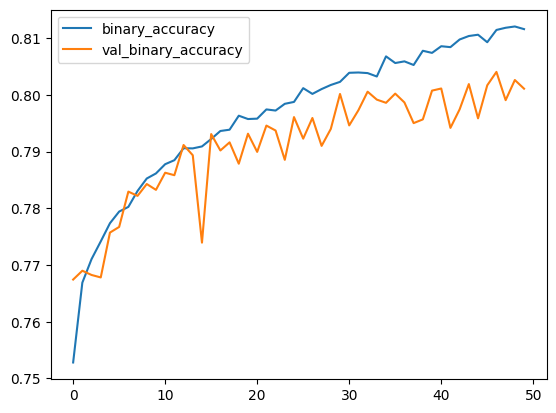

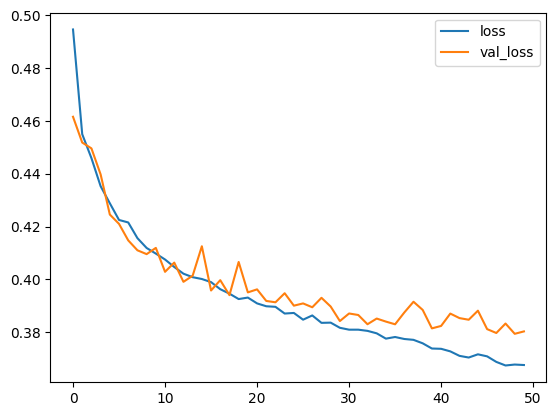

In [37]:
history_df[['binary_accuracy', 'val_binary_accuracy']].plot()
history_df[['loss', 'val_loss']].plot()

In [ ]:
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))


Best Validation Loss: 0.3793
Best Validation Accuracy: 0.8027


In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Model Evaluation

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
#below 0.5 means the class with label 0 and 0.5 or above means the class with label 1.
y_pred_bool = (y_pred > 0.5).astype(int)
report = classification_report(y_test.values, y_pred_bool.flatten(), output_dict=True)['weighted avg']


372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
report

{'precision': 0.8197909140259098,
 'recall': 0.8013951924693226,
 'f1-score': 0.7857838730526125,
 'support': 11898.0}

<Axes: title={'center': 'Confusion Matrix: Test Data'}>

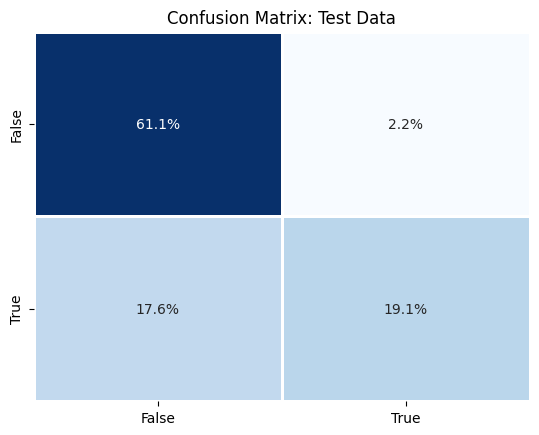

In [ ]:
plt.title('Confusion Matrix: Test Data')
conf_mat = confusion_matrix(y_test.values, y_pred_bool.flatten(), normalize='all')
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='.1%',
    cmap="Blues",
    xticklabels=['False', 'True'], yticklabels=['False', 'True'],
    linewidths=2,
    linecolor='white',
    cbar=False,
)

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score


ROC AUC Score: 0.8901061076648626


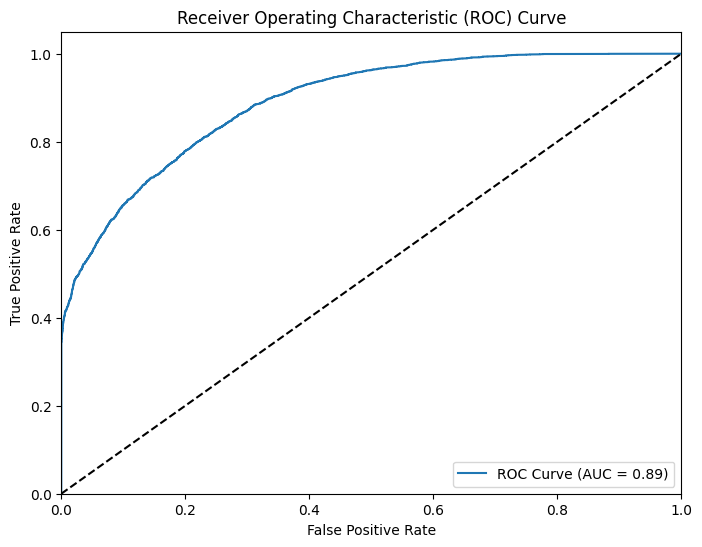

In [ ]:

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

- **ROC Curve(Blue Line)**: This line traces the trade-off between TPR and FPR at various threshold levels. Starting from the bottom left (where threshold is at its maximum, predicting all negatives) to the top right (where threshold is at its minimum, predicting all positives).

- **Diagonal Dashed Line**: This line represents a random classifier's performance (AUC = 0.5). A classifier with no discriminative ability would perform along this line, meaning its predictions are no better than random guessing.

- **Area Under the Curve (AUC Score)**: The AUC score, here shown as 0.89, quantifies the overall ability of the model to discriminate between the positive and negative classes. An AUC of 1.0 represents a perfect model, whereas an AUC of 0.5 suggests a model with no discriminatory ability.


### Fine-Tuning

In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [38]:
import keras_tuner as kt
from keras_tuner.engine.hyperparameters import HyperParameters

In [45]:
def model_builder(hp):
    model = keras.Sequential(
        [
            # Choose an optimal value between 32-512
            layers.Dense(units= hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=[len(X_train.keys())]),
            layers.Dense(units= hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'),
            layers.Dense(1, activation='sigmoid'),
        ]

    )
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]) # This line was incorrectly indented
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        #optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model

In [51]:
tuner = kt.RandomSearch(
    model_builder,
    objective='binary_accuracy',
    max_trials=10,  # Number of different hyperparameter combinations to try
    directory='my_dir',  # Directory where logs and results will be stored
    project_name='my_project'  # Name for the tuning project
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [52]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2,callbacks=[stop_early])
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 10 Complete [00h 04m 30s]
binary_accuracy: 0.7827609777450562

Best binary_accuracy So Far: 0.815959632396698
Total elapsed time: 00h 43m 41s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.001.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [57]:
best_hyperparameters

In [59]:
best_model = model_builder(best_hyperparameters)

# Train the best model with your training data
history_tuned = best_model.fit(
    X_train, y_train,
    validation_split = 0.3,
    batch_size=512,
    epochs=50,
    #callbacks=[early_stopping],
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - binary_accuracy: 0.7242 - loss: 0.5564 - val_binary_accuracy: 0.7671 - val_loss: 0.4669
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - binary_accuracy: 0.7632 - loss: 0.4664 - val_binary_accuracy: 0.7694 - val_loss: 0.4534
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.7673 - loss: 0.4545 - val_binary_accuracy: 0.7692 - val_loss: 0.4453
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - binary_accuracy: 0.7718 - loss: 0.4468 - val_binary_accuracy: 0.7656 - val_loss: 0.4462
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - binary_accuracy: 0.7747 - loss: 0.4398 - val_binary_accuracy: 0.7725 - val_loss: 0.4362
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.7769 - loss: 0.4341 - val_binary_accuracy: 0.7753 - val_loss: 0.4351
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.7765 - loss: 0.4310 - val_binary_accuracy: 0.7757 - val_loss: 0.4276
Epoch 8/50
1

In [63]:
y_pred_tuned = model.predict(X_test)

history_df_tuned = pd.DataFrame(history_tuned.history)

# Calculate the ROC curve
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_tuned)

# Calculate the ROC AUC score
roc_auc_tuned = roc_auc_score(y_test, y_pred_tuned)

roc_auc_tuned = roc_auc_score(y_test, y_pred_tuned)

print("ROC AUC Score:", roc_auc_tuned)

372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
ROC AUC Score: 0.8907428473145819


In [67]:
y_pred_bool2 = (y_pred_tuned > 0.5).astype(int)
report = classification_report(y_test.values, y_pred_bool2.flatten(), output_dict=True)['weighted avg']
report

{'precision': 0.8071620604167893,
 'recall': 0.809463775424441,
 'f1-score': 0.8061977004471366,
 'support': 11898.0}

<Axes: title={'center': 'Confusion Matrix after tuning: Test Data'}>

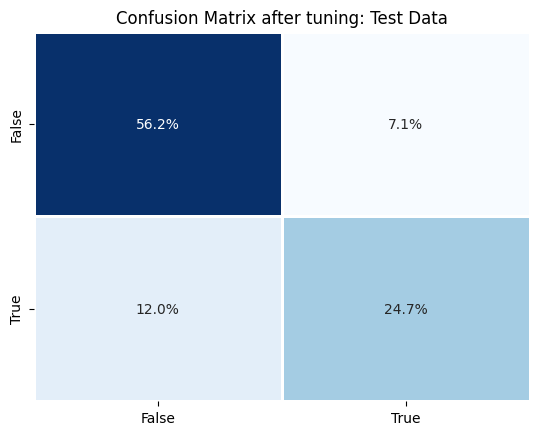

In [70]:
plt.title('Confusion Matrix after tuning: Test Data')
conf_mat = confusion_matrix(y_test.values, y_pred_bool2.flatten(), normalize='all')
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='.1%',
    cmap="Blues",
    xticklabels=['False', 'True'], yticklabels=['False', 'True'],
    linewidths=2,
    linecolor='white',
    cbar=False,
)

In [ ]:
Source for tuning: https://www.tensorflow.org/tutorials/keras/keras_tuner